In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import HowToBreakIntoTheField as t
%matplotlib inline

df = pd.read_csv('./2017_SOF.csv')
df = df.dropna(subset = ['JobSeekingStatus'], how = 'any')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN


<AxesSubplot:>

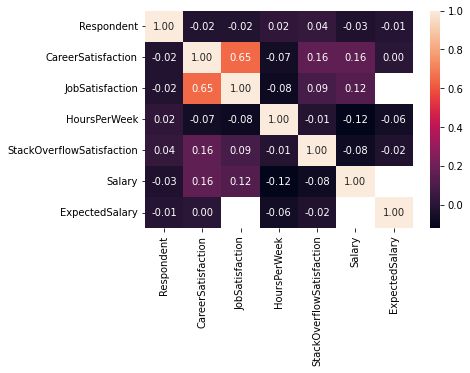

In [3]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f")

In [7]:
x = df["JobSeekingStatus"].value_counts().reset_index()
x
# x.describe()

,index,JobSeekingStatus
0,"I'm not actively looking, but I am open to new...",20729
1,I am not interested in new job opportunities,8280
2,I am actively looking for a job,4371


In [9]:
y = df.groupby('JobSeekingStatus', as_index=False)['Salary'].mean()
y

,JobSeekingStatus,Salary
0,I am actively looking for a job,46466.057258
1,I am not interested in new job opportunities,65796.241218
2,"I'm not actively looking, but I am open to new...",55157.846599


In [10]:
z = df.groupby('JobSeekingStatus', as_index=False)['JobSatisfaction'].mean()
z

,JobSeekingStatus,JobSatisfaction
0,I am actively looking for a job,4.903293
1,I am not interested in new job opportunities,8.285528
2,"I'm not actively looking, but I am open to new...",6.785350


In [20]:
df.groupby('JobSeekingStatus', as_index = False)['CompanySize']
# df.sort_values(by = ['JobSeekingStatus'])

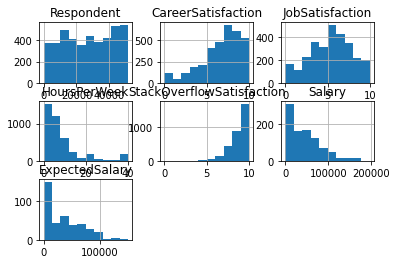

In [29]:
looking = df.loc[df['JobSeekingStatus'] == "I am actively looking for a job"]
looking.hist();

In [26]:
looking['Country'].value_counts().reset_index()

,index,Country
0,United States,1000
1,India,805
2,United Kingdom,278
3,Germany,244
4,Canada,176
...,...,...
135,Angola,1
136,Panama,1
137,Bahrain,1
138,Rwanda,1


In [27]:
looking['CompanySize'].value_counts().reset_index()

,index,CompanySize
0,20 to 99 employees,583
1,100 to 499 employees,477
2,"10,000 or more employees",452
3,10 to 19 employees,339
4,Fewer than 10 employees,267
5,"1,000 to 4,999 employees",263
6,500 to 999 employees,181
7,"5,000 to 9,999 employees",136
8,I don't know,65
9,I prefer not to answer,37


In [7]:
x = looking['YearsProgram'].value_counts().reset_index()
x.max()

index           Less than a year
YearsProgram                 567
dtype: object

In [14]:
most = looking.mode()
x = most.iloc[0]
x

Respondent                                      4
Professional               Professional developer
ProgramHobby            Yes, I program as a hobby
Country                             United States
University                                     No
                                  ...            
QuestionsInteresting                        Agree
QuestionsConfusing                       Disagree
InterestedAnswers                  Strongly agree
Salary                                53763.44086
ExpectedSalary                            60000.0
Name: 0, Length: 154, dtype: object

In [17]:
#make an infographic of all the top characteristics of someone who is looking fora  jobb
# describptive stats include
# histogram
# bar chart of percent for top stats
# looking.idxmax(axis =1)
looking['Professional'].value_counts(normalize=True) * 100


Professional developer                                  62.457104
Student                                                 21.985816
Professional non-developer who sometimes writes code    11.256005
Used to be a professional developer                      2.470830
None of these                                            1.830245
Name: Professional, dtype: float64

In [34]:
looking.mean()

C:\Users\marti\AppData\Local\Temp/ipykernel_16540/4006277343.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  looking.mean(numeric_only = None)


Respondent                   27032.459163
CareerSatisfaction               6.292625
JobSatisfaction                  4.903293
HoursPerWeek                     8.241832
StackOverflowSatisfaction        8.383308
Salary                       46466.057258
ExpectedSalary               34424.752257
dtype: float64

In [30]:
looking.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,4371.000000,3390.000000,2885.000000,4193.000000,3295.000000,935.000000,384.000000
mean,27032.459163,6.292625,4.903293,8.241832,8.383308,46466.057258,34424.752257
std,15091.685199,2.410983,2.458675,9.331582,1.480585,40152.983905,31045.861404
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.044046,0.000000
25%,13727.000000,5.000000,3.000000,2.000000,8.000000,11011.598884,5000.955906
50%,27508.000000,7.000000,5.000000,5.000000,9.000000,39095.022624,30000.000000
75%,41071.000000,8.000000,7.000000,10.000000,10.000000,66433.333333,57398.582600
max,51388.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,150000.000000


In [32]:
notlooking = df.loc[df['JobSeekingStatus'] == "I am not interested in new job opportunities"]
notlooking.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,8280.000000,7202.000000,6903.000000,27.000000,6875.000000,2371.000000,271.000000
mean,25229.338164,8.052485,8.285528,1.925926,8.409164,65796.241218,37319.953563
std,15083.328682,1.598506,1.553463,4.419589,1.412877,39852.809500,32397.322706
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12025.750000,7.000000,8.000000,0.000000,8.000000,38093.068772,7341.065923
50%,24670.500000,8.000000,8.000000,0.000000,9.000000,59139.784946,32258.064516
75%,38848.750000,9.000000,9.000000,1.000000,9.000000,90909.090909,53763.440860
max,51376.000000,10.000000,10.000000,20.000000,10.000000,195000.000000,150000.000000


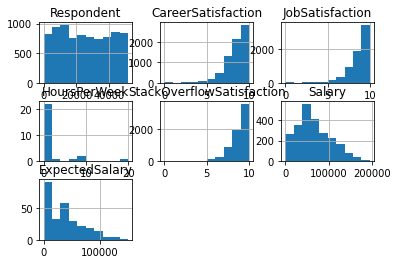

In [33]:
notlooking.hist();

In [39]:
df = df[["CareerSatisfaction","JobSatisfaction","HoursPerWeek","StackOverflowSatisfaction","Salary","ExpectedSalary"]]
x


,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
0,NaN,NaN,0.0,9.0,NaN,NaN
3,6.0,3.0,5.0,10.0,NaN,NaN
5,NaN,NaN,0.0,6.0,NaN,NaN
6,7.0,6.0,1.0,8.0,NaN,NaN
7,7.0,7.0,1.0,7.0,NaN,NaN
...,...,...,...,...,...,...
51385,7.0,7.0,4.0,9.0,NaN,NaN
51386,7.0,4.0,2.0,9.0,NaN,NaN
51387,7.0,3.0,5.0,9.0,58000.0,NaN
51390,6.0,7.0,1.0,9.0,40000.0,NaN
